In [1]:
from pytket.extensions.nexus import Nexus, QuantinuumConfig
#from pytket.extensions.quantinuum import QuantinuumBackend
from pytket.extensions.nexus.backends import NexusBackend
from pytket.backends.resulthandle import ResultHandle
from pytket import Circuit
from pytket.unit_id import BitRegister
from pytket.circuit.display import render_circuit_jupyter
import networkx as nx
import matplotlib.pyplot as plt
import math as ma 
import numpy as np
import random as rm
import pandas as pd
import re
import copy
import warnings
import sympy as sy
import itertools
import ast
from datetime import datetime
import sys
sys.path.append('/home/jovyan/BenchmarkingQuantinuumH1/src')
today_date = datetime.today().strftime('%Y%m%d')
data_path = '/home/jovyan/BenchmarkingQuantinuumH1/data/'
file_name = 'circuit_01_output_per_shots.csv'
data_name = data_path + today_date + '_'+ file_name

import helper_functions as hf
import circuits_version_02 as cv2

In [2]:
my_new_quantinuum_exp = Nexus().get_project_by_name("UBQC")
configuration = QuantinuumConfig(device_name="H1-1E", user_group="Default")
backend = NexusBackend(configuration, my_new_quantinuum_exp)

#from pytket.extensions.quantinuum import QuantinuumBackend, QuantinuumAPIOffline
#api_offline = QuantinuumAPIOffline()
#backend = QuantinuumBackend(device_name="H1-1LE", api_handler = api_offline)


Started using project with name: UBQC


In [3]:
n_shots = 100

In [3]:
circuit = cv2.circuit_01()
compiled_circuit = backend.get_compiled_circuit(circuit)

In [5]:
handle = backend.process_circuit(compiled_circuit, n_shots=n_shots)

In [17]:
#backend.cost(compiled_circuit, n_shots = 10, syntax_checker = "H1-1SC")
#backend.cost(compiled_circuit, n_shots = 10, syntax_checker = "H1-1SC")
from pytket.extensions.quantinuum import QuantinuumBackend
q_backend = QuantinuumBackend(device_name="H1-1E")

range(1, 10000, 100)

In [24]:
shot_list = range(1, 5000, 500)
cost_est = [q_backend.cost(compiled_circuit, n_shots = i, syntax_checker = "H1-1SC") for i in shot_list]

In [26]:
[i/j for i,j in zip(cost_est,shot_list)]

[5.001,
 0.010980039920159682,
 0.005995004995004994,
 0.004331112591605596,
 0.003498750624687656,
 0.0029992003198720508,
 0.002666111296234588,
 0.002428163381890888,
 0.002249687578105474,
 0.0021108642523883585]

In [29]:
[(i,j) for i,j in zip(range(5),range(4,7))]

[(0, 4), (1, 5), (2, 6)]

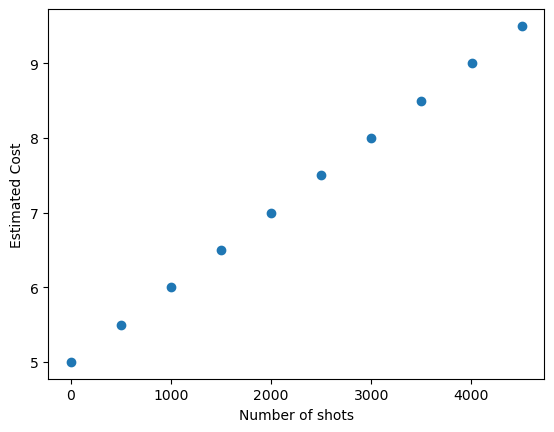

In [25]:
# Plot scatter plot
plt.scatter(shot_list, cost_est)

# Add labels and title
plt.xlabel('Number of shots')
plt.ylabel('Estimated Cost')

# Show plot
plt.show()

In [69]:
results = backend.get_result(handle)

In [70]:
class_ran_bit = results.get_shots(cbits = circuit.get_c_register(name="classical_reg"))
z_res_rand_bit = results.get_shots(cbits = circuit.get_c_register(name='Z_condition_gate_reg'))
z_basis_rand_bit = results.get_shots(cbits = circuit.get_c_register(name='Z_condition_reg'))
x_basis_rand_bit = results.get_shots(cbits = circuit.get_c_register(name='X_condition_reg'))
c_res_bits = [i[0] for i in class_ran_bit]
z_res_bits = [i[0] for i in z_res_rand_bit]
z_basis_bits = [i[0] for i in z_basis_rand_bit]
x_basis_bits = [i[0] for i in x_basis_rand_bit]
sdg_column = [i & j for i,j in zip(z_basis_bits,x_basis_bits)]
basis = [hf.func_2_str_basis_letter(hf.generate_basis_from_two_bits(bit1, bit2)) for bit1,bit2 in zip(z_basis_bits,x_basis_bits)]
shot_num = [i+1 for i in range(len(c_res_bits))]

In [71]:
df = pd.DataFrame({'Shot_num':shot_num,'Z_gate_cond_bit':z_res_bits,'Z_bit_basis':z_basis_bits,'X_bit_basis':x_basis_bits,'Sdg_gate_applied':sdg_column,'H_gate_applied':x_basis_bits,'Measure_basis':basis,'Outcome':c_res_bits})

In [72]:
df.to_csv(data_name)